In [75]:
% matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import json
import time
from time import strftime
from datetime import datetime
import matplotlib 
import random
from IPython.core.display import clear_output
from sklearn.externals import joblib


# Scrapping the urls

In [19]:
meta=pd.read_csv("/Users/natacha/Dropbox/Insight NOtebooks/kickstarter_meta.csv",index_col="index1")

In [20]:
meta.head()

,backers_count,blurb,category,created_at,deadline,goal,name,pledged,country,state,subcategory,link,percentage_founded,founded_bool
index1,,,,,,,,,,,,,,
0,80,I will be an artist-in-residence at Elsewhere ...,art,2012-01-07 18:55:05,2012-04-19 16:16:00,2800.0,Elsewhere Studios artist-in-residency program!,3596.0,US,CO,mixed media,https://www.kickstarter.com/projects/hilaryeme...,128.428571,True
1,47,We are looking to bring a Visiting Sculptor fr...,art,2012-03-02 17:29:22,2012-04-20 18:06:38,3900.0,Martin Luther King Jr. Sculpture on Campus!,4117.0,US,CA,NaN,https://www.kickstarter.com/projects/153685020...,105.564103,True
2,80,Surrealistic oil paintings capturing the metam...,art,2012-03-24 10:16:07,2012-04-16 23:59:00,750.0,EMERGENCE: Surreal Oil Paintings by J.J. Long,3125.0,US,MA,painting,https://www.kickstarter.com/projects/203971390...,416.666667,True
3,82,1000 Artists is a public art-making installati...,art,2012-03-05 00:41:24,2012-05-07 21:22:25,4500.0,1000 Artists: Presidential Inauguration 2013,4586.0,US,DC,public art,https://www.kickstarter.com/projects/17146650/...,101.911111,True
4,31,P.M.A.F.T.W. my upcoming solo show June 2012 a...,art,2012-03-23 00:23:27,2012-04-02 22:57:23,1000.0,P.M.A.F.T.W.,1036.0,US,OR,painting,https://www.kickstarter.com/projects/144231475...,103.600000,True


In [21]:
meta.keys()

Index(['backers_count', 'blurb', 'category', 'created_at', 'deadline', 'goal',
       'name', 'pledged', 'country', 'state', 'subcategory', 'link',
       'percentage_founded', 'founded_bool'],
      dtype='object')

In [22]:
seed = np.random.seed(42)
meta_sample = meta.sample(50000)

In [30]:
meta_sample=meta_sample.reset_index()

In [31]:
meta_sample

,index1,backers_count,blurb,category,created_at,deadline,goal,name,pledged,country,state,subcategory,link,percentage_founded,founded_bool
0,71732,822,America...the late 60’s. Hippies and the count...,games,2014-02-04 15:14:53,2014-03-15 01:00:00,5000.0,Greed,26208.00,US,TX,tabletop games,https://www.kickstarter.com/projects/101637482...,524.160000,True
1,125268,7,Join me to learn the Art of Composite molding ...,technology,2014-08-11 00:36:09,2014-09-15 01:48:22,25000.0,Composite Molding and fabrication for a 1/4 TA...,625.00,US,FL,flight,https://www.kickstarter.com/projects/148480575...,2.500000,False
2,48219,708,The Shadow Cabal is a high-impact Action/Adven...,film & video,2012-10-06 22:29:46,2012-12-11 13:57:31,20000.0,The Shadow Cabal (feature film),33327.00,US,UT,narrative film,https://www.kickstarter.com/projects/arrowstor...,166.635000,True
3,120597,114,YouMatter is an app that allows you to send pr...,technology,2015-07-08 19:08:07,2015-09-02 07:25:29,15000.0,You Matter App,15164.27,US,PA,apps,https://www.kickstarter.com/projects/140852219...,101.095133,True
4,88850,124,"David Dalla G's second album ""All Sides"" is co...",music,2015-01-26 13:40:30,2015-03-03 01:59:00,5000.0,All Sides: David Dalla G's Second Album,10025.00,US,MT,hip-hop,https://www.kickstarter.com/projects/105391897...,200.500000,True
5,33555,3,Tie Buddy. Simple solution to replace the tie ...,fashion,2015-02-02 20:44:32,2015-03-11 11:14:17,3500.0,The Tie Buddy,13.00,US,AR,accessories,https://www.kickstarter.com/projects/122532390...,0.371429,False
6,90176,7,"My goal is to produce10-13 tracks album, mix a...",music,2016-02-18 01:24:41,2016-04-29 21:39:01,6600.0,Support me bring hope to the hopeless with my ...,365.00,US,TX,faith,https://www.kickstarter.com/projects/194461040...,5.530303,False
7,129001,16,This collage of found texts confronts the scar...,theater,2011-06-07 22:31:46,2011-07-01 23:02:00,1250.0,Laer's Last Prayer,2155.00,US,IL,NaN,https://www.kickstarter.com/projects/130610441...,172.400000,True
8,57715,32,New food and cooking magazine serving Northwes...,food,2012-08-14 19:05:52,2012-10-04 15:03:55,2000.0,Spoon Magazine,3553.00,US,IL,NaN,https://www.kickstarter.com/projects/268715856...,177.650000,True
9,73218,88,56 original pen & ink drawings inspired by the...,games,2013-02-26 13:22:10,2014-09-24 16:16:27,4000.0,Renaissance Playing Cards - each unique card h...,4089.00,US,MN,playing cards,https://www.kickstarter.com/projects/424368844...,102.225000,True


In [23]:
ag=meta.groupby('category').founded_bool.value_counts().sort_index()
ag_sample=meta_sample.groupby('category').founded_bool.value_counts().sort_index()

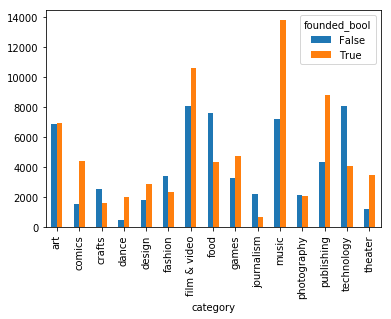

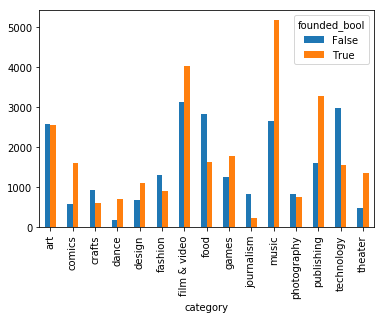

In [24]:
# shows the bias of our sample per category for founded/unfounded project
ag.unstack().plot(kind='bar')
ag_sample.unstack().plot(kind="bar")

In [148]:
bins=np.arange(0,len(meta_sample)+1000,1000)
#bins=np.arange(0,12,3)

In [167]:
for i in range(0,len(bins)-1):
    
    scraped = pd.DataFrame(columns=["index1",'HTML'])
    time_on = time.time()
    
    request_count = 0

    star_ID = bins[i]
    fin_ID = bins[i+1]

    for index, row in meta_sample[star_ID:fin_ID].iterrows():
        # Perform a request and timeout after 20 seconds since some pages may take
        # longer to scrape
        scraped_html = requests.get(row['link'], timeout=20)

        # Pause the loop for a random amount of time
        #time.sleep(random.uniform(2, 4))
        time.sleep(random.uniform(1, 3))

        # Monitor the requests by clearing the output and displaying current 
        # progress
        elapsed_time = time.time() - time_on
        clear_output(wait = True)
        print(
            'Bin_start: {};Request: {}; Row ID: {}; Frequency: {} requests/sec'.format(bins[i],
                request_count + star_ID,
                index,
                (request_count + 1) / elapsed_time
            )
        )
        request_count += 1

        # Record scraped HTML
        scraped.loc[index, 'HTML'] = scraped_html
        scraped.loc[index, 'index1'] = row["index1"]

    # Display the overall time, average scraping speed and total number of scraped
    # project pages
    run_time = time.time() - time_on
    print()
    print('Run time:', run_time)
    print('Average rate:', len(scraped) / run_time)
    print('# of projects scraped:', len(scraped))
    
    joblib.dump(
    scraped, '/Scraped_HTML/scraped_html_{}-{}.pkl'.format(
        star_ID,
        fin_ID - 1))
print("DONE")  

Bin_start: 49000;Request: 49999; Row ID: 49999; Frequency: 0.3704293739769024 requests/sec

Run time: 2699.5744671821594
Average rate: 0.3704287517001926
# of projects scraped: 1000
DONE
